In [ ]:
import torch as tc
from random import Random
from time import monotonic
from math import sqrt as root
from math import tanh

In [ ]:
def generate_num(N=1000):
  SEED = 5
  random_num = Random(x=SEED)
  lst_x, lst_y = [],[]
  for _ in range(N):
    lst_x.append(random_num.uniform(a=0,b=1))
  for _ in range(N):
    lst_y.append(random_num.uniform(a=0,b=1))
  return lst_x, lst_y
data_x, data_y =generate_num()

In [ ]:
def loss(x_p, y_p):
  return (1/len(data_y))* sum([root((x_i-x_p)**2+(y_i-y_p)**2) for x_i , y_i in zip(data_x, data_y)])

In [ ]:
# STEP = 0.01
# MESH_SIZE = 300
# x_mesh = [0 + i* STEP for i in range(MESH_SIZE)]
# y_mesh = [0 + i* STEP for i in range(MESH_SIZE)]
# start_time = monotonic()
# z_mesh = [
#     [loss(x_curr, y_curr) for x_curr in x_mesh]
#           for y_curr in y_mesh
#           ]
# print(f"Time = {(monotonic() - start_time) * 1000 } ms")

In [ ]:
data_torch = tc.tensor([data_x,data_y])
# print(f"shape  {data_torch.shape}")
data_torch = data_torch.t()
# print(f"shape after transpose {data_torch.shape}")
# print(f"dimension  {data_torch.ndim}")
# print(data_torch.storage().data_ptr()) #---> return sequence of data
pnt = tc.tensor([5,5])
# print(pnt.storage())
result = data_torch - pnt
# print(result.shape)
result = result **2
result = result.sum(dim = 1)
result = tc.sqrt(result)
result = result.sum(dim = 0)/data_torch.shape[0]
print(result)

tensor(6.3829)


### Stride in one dimension "from cloumn to other coulmn" ---> 1 
### Stride in two dimension "from row to other row" ---> 2

# Broadcasting

In [ ]:
# data_torch = data_torch.broadcast_to(100,1000,2)
# print(f"dimension after broadcasting  {data_torch.ndim}")
# print(f"strides after broadcasting  {data_torch.stride(0)},{data_torch.stride(1)},{data_torch.stride(2)}")

# Torch loss function "lambda function"

In [ ]:
torch_loss = lambda pnt,data : tc.sqrt(((data - pnt)**2).sum(dim = 1)).sum(dim = 0)/data.shape[0]
STEP = 0.01
MESH_SIZE = 300
x_mesh = [0 + i* STEP for i in range(MESH_SIZE)]
y_mesh = [0 + i* STEP for i in range(MESH_SIZE)]
start_time = monotonic()
z_mesh = [
    [torch_loss(tc.tensor([x_curr, y_curr]), data_torch) for x_curr in x_mesh]
          for y_curr in y_mesh
          ]
print(f"Time = {(monotonic() - start_time) * 1000 } ms")

Time = 8462.503040999998 ms


# Supervised learning ☹

In [ ]:
from sklearn.datasets import make_moons
from math import floor
N = 1000 # number of samples
noise = 0.1
train_percent = 0.8

# mini batch trail
# x_shape = 2 , y_shape = 1
x , y = make_moons(n_samples = N , shuffle = True , noise = noise , random_state= 5)
x_train, y_train = x[:floor(N*train_percent), ], y[:floor(N*train_percent) ]
x_valid , y_valid = x[floor(N*train_percent):, ], y[floor(N*train_percent): ]
print(y_train.shape)

(800,)


# Plotting the data

In [ ]:
from matplotlib.pyplot import figure
import numpy as np

fig = figure(figsize=(20,6))
(ax1, ax2, ax3 ) = fig.subplots(1 ,3)

# all data include training and validation
ax1.plot(x_train[: , 0],x_train[: , 1], "k." )
ax1.plot(x_valid[: , 0],x_valid[: , 1], "rx" )

# only training data
train_one_indices = np.argwhere(y_train == 1)
train_zero_indices = np.argwhere(y_train == 0)
ax2.plot(x_train[train_one_indices , 0],x_train[train_one_indices , 1], "k." )
ax2.plot(x_train[train_zero_indices , 0],x_train[train_zero_indices , 1], "r." )

# only validation data
valid_one_indices = np.argwhere(y_valid == 1)
valid_zero_indices = np.argwhere(y_valid == 0)
ax3.plot(x_valid[valid_one_indices , 0],x_valid[valid_one_indices , 1], "kx" )
ax3.plot(x_valid[valid_zero_indices , 0],x_valid[valid_zero_indices , 1], "rx" )


## Move to pytorch

In [ ]:
x_train, y_train = tc.tensor(x_train), tc.tensor(y_train)
x_valid , y_valid = tc.tensor(x_valid), tc.tensor(y_valid)
# print(type(x_train))

y_train = tc.nn.functional.one_hot(y_train , num_classes= 2)
y_valid = tc.nn.functional.one_hot(y_valid , num_classes= 2)

# print(y_train[:])

## Forward path

In [ ]:
tc.manual_seed( seed = 5)
w = tc.randn(size = (2,2))
w = w.to(tc.float64)
w.requires_grad = True
w.retain_grad()

tc.manual_seed( seed = 5)
b = tc.randn(size = (1,2))
b = b.to(tc.float64)
b.requires_grad = True
b.retain_grad()

# Softmax 
* an activation function that is typically used for multi-class classification problems. It transforms the output of a neural network into a probability distribution over the classes, where the sum of the probabilities is 1. The output of the Softmax function is always between 0 and 1.
$$\text{softmax(z_i) = exp(z_i) / sum(exp(z_j))}$$

# Tanh
* an activation function that is typically used in hidden layers of neural networks. It maps the input to a range between -1 and 1. It is similar to the sigmoid function, but it has a steeper gradient around 0.
$$\text{tanh(z) = (exp(z) - exp(-z)) / (exp(z) + exp(-z))}$$

# Sigmoid
*  an activation function that is typically used in binary classification problems. It maps the input to a range between 0 and 1. The sigmoid function is a smoothed version of a step function, which allows it to produce a continuous output. 

$$\text{sigmoid(z) = 1 / (1 + exp(-z))}$$

In [ ]:
def predict(x):
  a = x @ w.t() + b 
  return tc.softmax(a , dim =1)

# #using tanh function
# def predict(x):
#   a = x @ w.t() + b 
#   return tc.tanh(a)

# Cross Entropy
 is a classification loss function that measures the dissimilarity between the predicted and actual outputs. It is commonly used for multi-class classification problems, where the goal is to predict the probability of each class. 
 $$\text{CE = -sum(y_true * log(y_pred))} $$

# Root Mean Square
a regression loss function that measures the average squared difference between the predicted and actual outputs. It is commonly used for regression problems, where the goal is to predict a continuous output variable

 $$\text{RMSE = sqrt(mean((y_true - y_pred)^2))} $$

In [ ]:
                  # cross entropy
def loss_torch(x, y):
  y_hat = predict(x)
  return tc.mean(-(y*tc.log(y_hat)).sum(dim =1))
                  # root mean square error
# def loss_torch(x, y):
#     y_hat = predict(x)
#     return tc.sqrt(((y_hat - y) ** 2).mean())

In [ ]:
# ls = loss_torch(tc.tensor([[1. ,1.], [2. ,2.]]), tc.tensor([[0 , 1], [1 , 0]]))
# print(ls)

# pre = predict(tc.tensor([[1. ,1.], [2. ,2.]]))
# print(pre)

# SOP 
stands for "Sum Of Products", which refers to the weighted sum of the inputs to a neuron in a neural network. The inputs are multiplied by their corresponding weights and then summed together with a bias term, resulting in a single scalar value that represents the total input to the neuron.
*******
# activation function
* The output of the SOP is then passed through an activation function, which is typically a non-linear function that introduces non-linearity into the neural network. This is important because without non-linear activation functions, a neural network would simply be a linear model, and would not be able to learn complex patterns or relationships in the data.

* Commonly used activation functions include the sigmoid function, the hyperbolic tangent (tanh) function

## Optimization loop

In [ ]:
EPOCHS = 1000
DELTA1 = 0.2 
DELTA2 = 0.1
train_ls , valid_ls = [], []
for _ in range(EPOCHS):
  curr_train_ls = loss_torch(x_train , y_train)
  curr_train_ls.backward()
  train_ls.append(curr_train_ls.data) 
  # This creates a block of code where gradients are not tracked, 
  # as we are not interested in computing gradients for the validation loss.
  with tc.no_grad():
    curr_valid_ls = loss_torch(x_valid , y_valid)
    valid_ls.append(curr_valid_ls.data)
    w -=  DELTA1 * w.grad.data  
    b -=  DELTA2 * b.grad.data
    # These reset the gradients to zero after each iteration "inplace".
    # This is necessary because PyTorch accumulates gradients by default.
    w.grad.zero_()
    b.grad.zero_()

## Visualization 

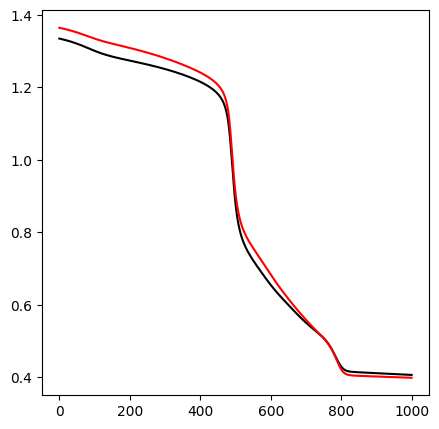

In [ ]:
fig = figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
ax.plot(train_ls , "k")
ax.plot(valid_ls , "r")

## Argmax
*   make the output value either 0 or 1, so 1 is for largest output value and 0 is for the rest of values.
*   easy to understand outputs.
*   it is not used in backpropagation, as it's $$ devrivative = 0 $$ 


## Softmax
*   make the output value between 0 , 1, so largest output value will remain large afer SOFTMAX and also for other values.
*   it is used in backpropagation, as it's $$ devrivative \neq 0 $$




# SGD

In [ ]:
EPOCHS = 50
DELTA = 0.1
sgd_train_loss, sgd_test_loss = [], []
BATCH_SIZE = 5
NUM_OF_BATCHES = floor(800 / BATCH_SIZE)
for _ in range(EPOCHS):
    for i in range(NUM_OF_BATCHES):
        batch_x_train = x_train[i*BATCH_SIZE: (i+1)*BATCH_SIZE, :]
        batch_y_train = y_train[i*BATCH_SIZE: (i+1)*BATCH_SIZE]
        sgd_curr_train_loss = loss_torch(batch_x_train, batch_y_train)
        sgd_curr_train_loss.backward()
        sgd_train_loss.append(sgd_curr_train_loss.data)
        with tc.no_grad():
            sgd_curr_test_loss = loss_torch(x_valid, y_valid)
            sgd_test_loss.append(sgd_curr_test_loss)
            w -= DELTA * w.grad.data
            b -= DELTA * b.grad.data
            w._grad.zero_()
            b._grad.zero_()      

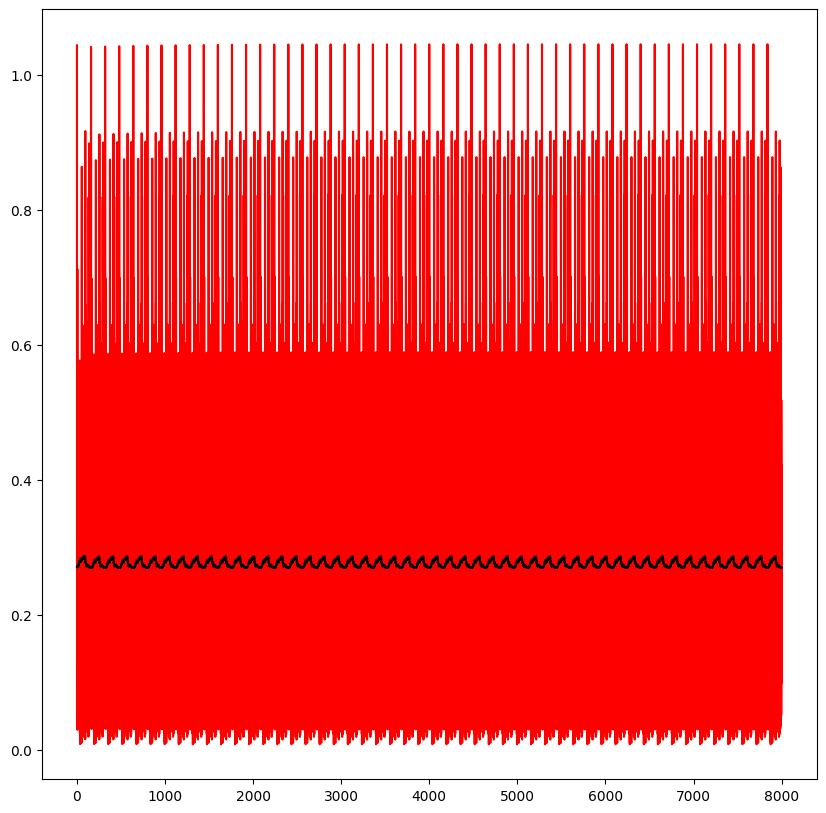

In [ ]:
fig = figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(sgd_train_loss, 'r')
ax.plot(sgd_test_loss, 'k')

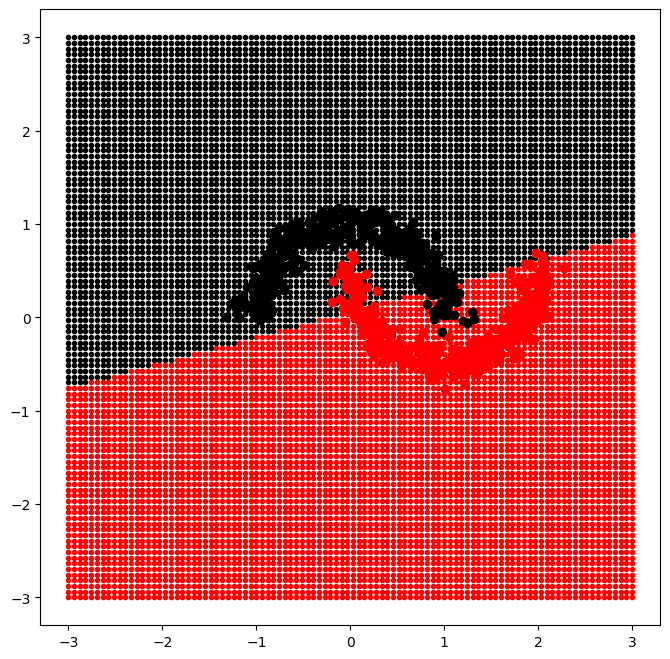

In [ ]:
with tc.no_grad():
  x_0 = tc.linspace(-3, 3, 100).repeat(1, 100).t()
  x_1 = tc.linspace(-3, 3, 100).repeat(100, 1).t().reshape(-1, 1)
  x = tc.hstack((x_0, x_1)).to(tc.double)
  x_plt = x.numpy()
  y_hat = predict(x)
  c_hat = tc.argmax(y_hat, dim = 1)
  c_hat_plt = c_hat.numpy()

fig_prediction = figure(figsize = (8, 8))
ax_prediction = fig_prediction.add_subplot(1, 1, 1)
ax_prediction.plot(x_plt[np.argwhere(c_hat_plt == 0), 0], x_plt[np.argwhere(c_hat_plt == 0), 1], "k.")
ax_prediction.plot(x_plt[np.argwhere(c_hat_plt == 1), 0], x_plt[np.argwhere(c_hat_plt == 1), 1], "r.")
ax_prediction.plot(x_train[train_zero_indices, 0], x_train[train_zero_indices, 1], "ko")
ax_prediction.plot(x_train[train_one_indices, 0], x_train[train_one_indices, 1], "ro")
fig_prediction.show()